<a href="https://colab.research.google.com/github/Sindhuhar/practice_computer_vision/blob/main/04_basic_image_processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Translation


In [5]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import cv2
import argparse
import imutils

### Function to display images in Google Colab

In [6]:
def plt_imshow(title,image):
  # convert the image frame BGR to RGB color space and display it
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

### Image translation with OpenCV

In [7]:
from google.colab import files
uploaded = files.upload()

Saving giraffe.png to giraffe.png


In [8]:
! ls

giraffe.png  sample_data


In [9]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="opencv_logo.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values

args = {
    "image" : "giraffe.png"
}

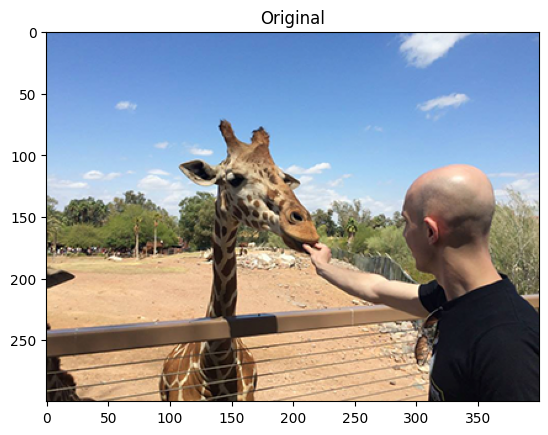

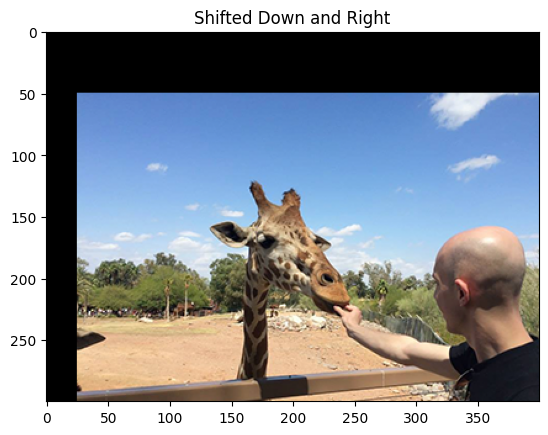

In [10]:
# load the image and display it to our screen

image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 25 pixels to the right and 50 pixels down

M = np.float32([[1,0,25], [0,1,50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

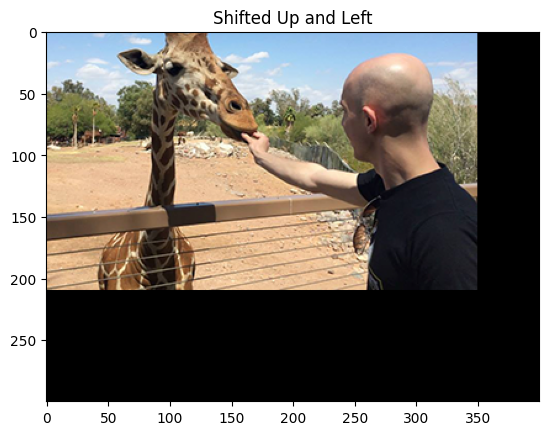

In [11]:
# now, let's shift the image 50 pixels to the left and 90 pixels
# up by specifying negative values for the x and y directions,
# respectively

M = np.float32([[1, 0, -50],[0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

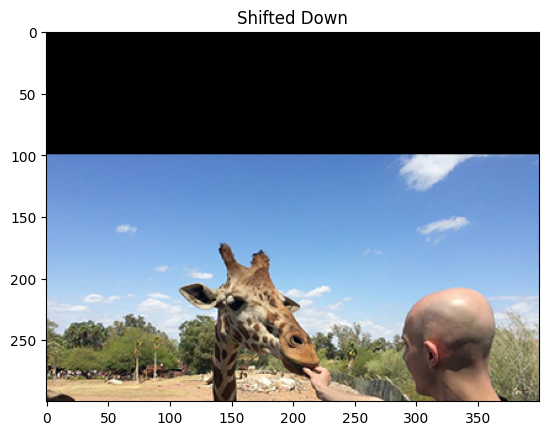

In [12]:
# use the imutils helper function to translate the image 100 pixels
# down in a single function call

shifted = imutils.translate(image, 0, 100)
plt_imshow("Shifted Down", shifted)

#Rotation

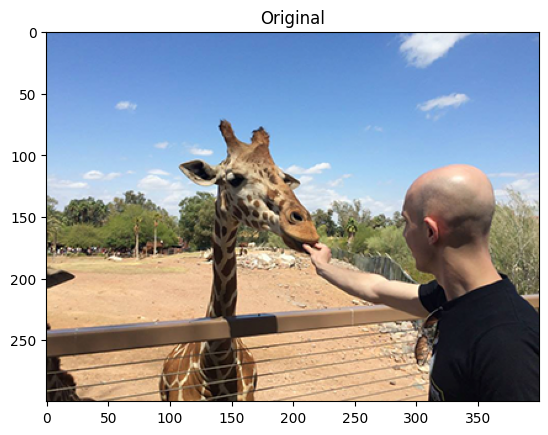

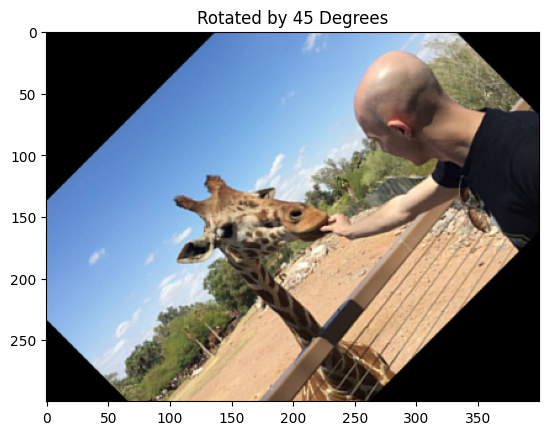

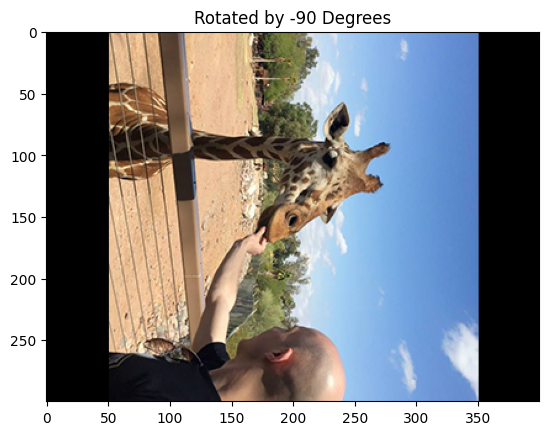

In [13]:
# load the image and show it
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image

M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image

M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

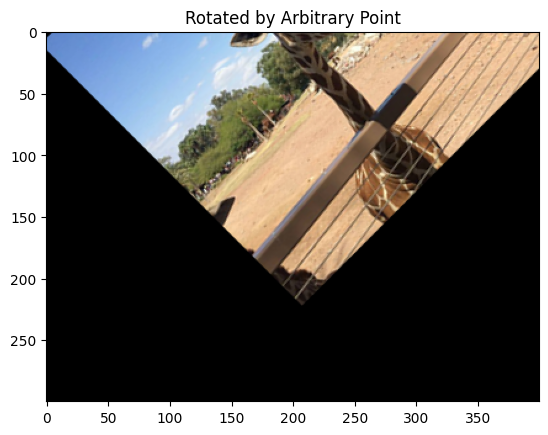

In [14]:
# rotate our image around an arbitrary point rather than the center

M = cv2.getRotationMatrix2D((10,10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point",rotated)

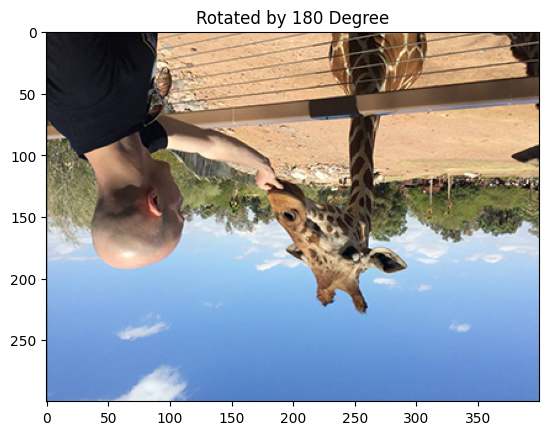

In [15]:
# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image,180)
plt_imshow("Rotated by 180 Degree", rotated)

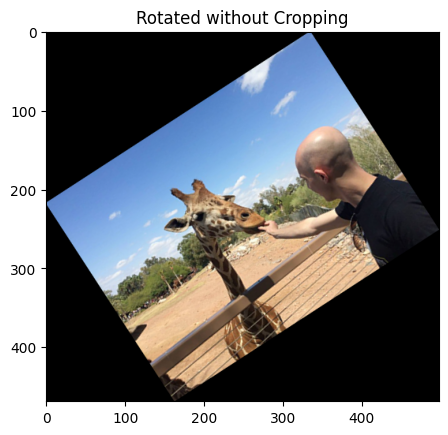

In [16]:
# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still views in the viewing area

rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated without Cropping",rotated)

Download the following image: http://pyimg.co/kwy7l

Then, use OpenCV to rotate the image 30 degrees clockwise. What is the value of the pixel located at x=335 and y=254?

In [17]:
from google.colab import files
uploaded = files.upload()

Saving wynn.png to wynn.png


In [18]:
! ls

giraffe.png  sample_data  wynn.png


In [19]:
args = {
    "image" : "wynn.png"
}

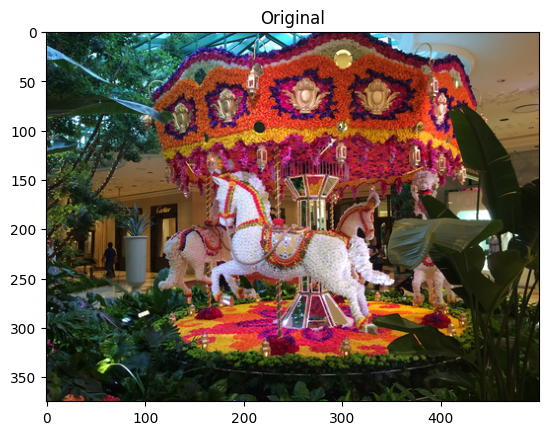

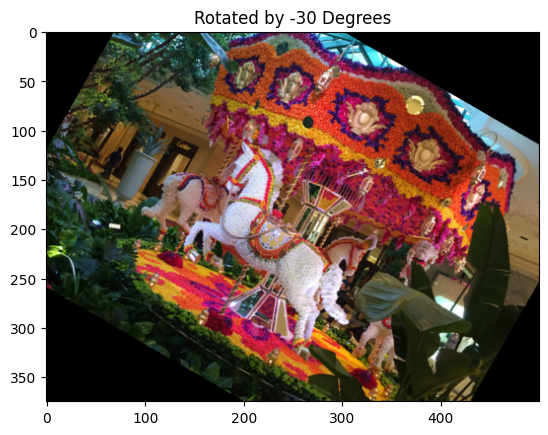

In [20]:
# load the image and show it

image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image

(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by -30 degrees around the center of the image

M = cv2.getRotationMatrix2D((cX, cY),-30, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
plt_imshow("Rotated by -30 Degrees", rotated)


where 1.0 means the same, original dimensions of the image are used. However, if you specified a value of 2.0, the image would be doubled in size. Similarly, a value of 0.5 halve the size of the image.

In [21]:
# access the pixel located at x=335, y=254

(b, g, r) = image[335, 254]
print("Pixels at (335, 254) - Red: {}, Green: {}, Blue: {}". format(r, g, b))

Pixels at (335, 254) - Red: 14, Green: 21, Blue: 7


#Resizing

In [22]:
args = {
    "image": "giraffe.png"
}

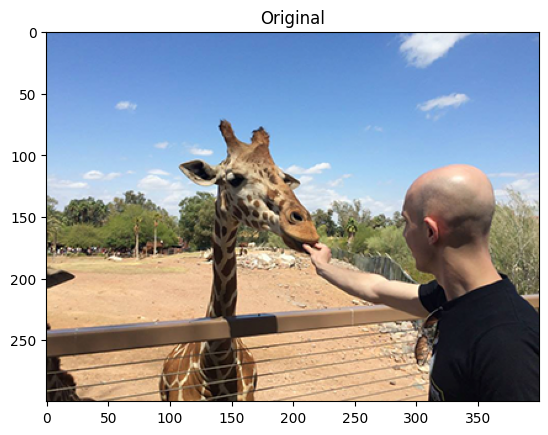

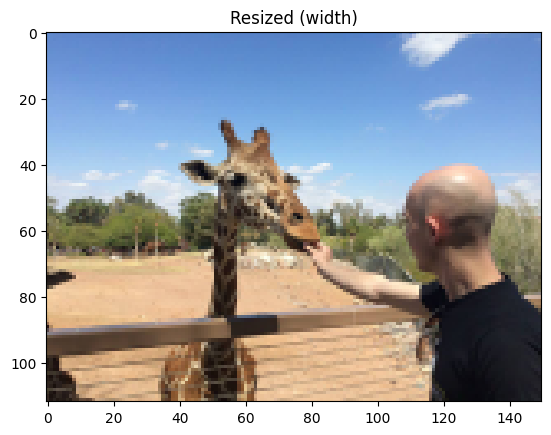

In [23]:
# load the original input image and display it to our screen

image = cv2.imread(args["image"])
plt_imshow("Original",image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width

r = 150.0/image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image

resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt_imshow("Resized (width)", resized)

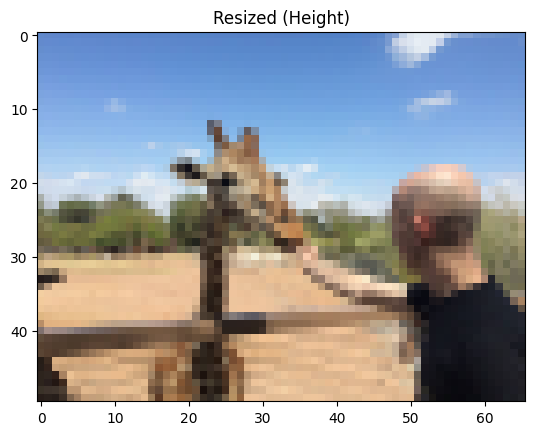

In [24]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio

r = 50.0 / image.shape[0]
dim = (int(image.shape[1]*r),50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

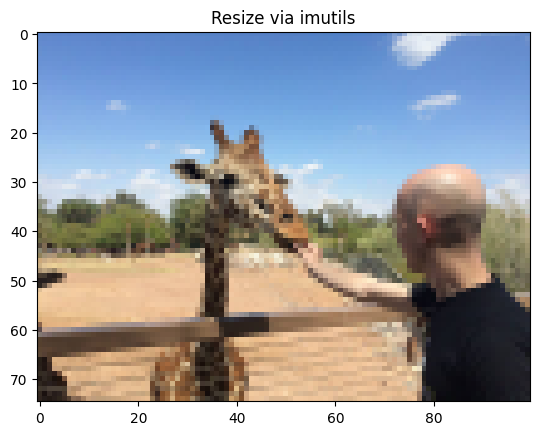

In [25]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us

resized = imutils.resize(image, width = 100)
plt_imshow("Resize via imutils", resized)

### Comparing OpenCV interpolation methods

[INFO] cv2.INTER_NEAREST


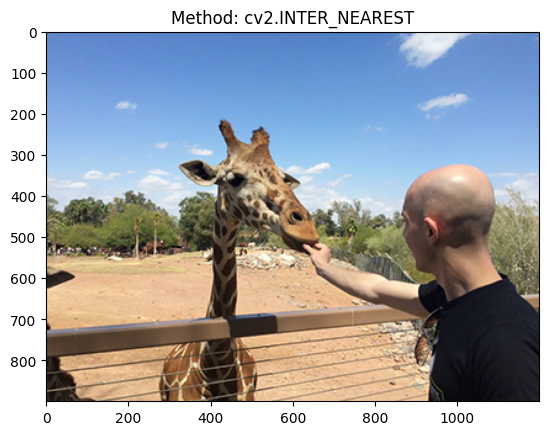

[INFO] cv2.INTER_LINEAR


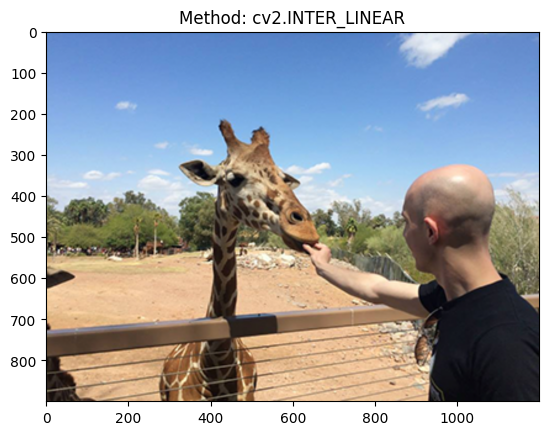

[INFO] cv2.INTER_AREA


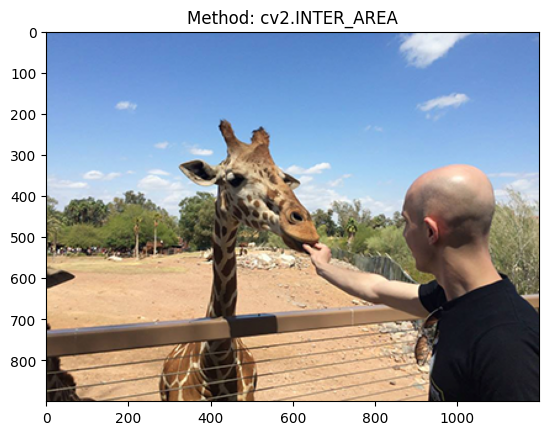

[INFO] cv2.INTER_CUBIC


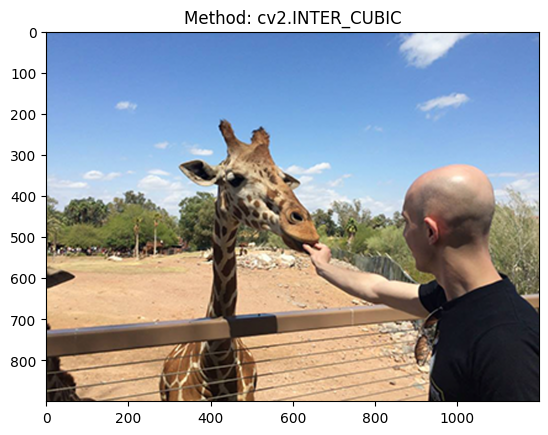

[INFO] cv2.INTER_LANCZOS4


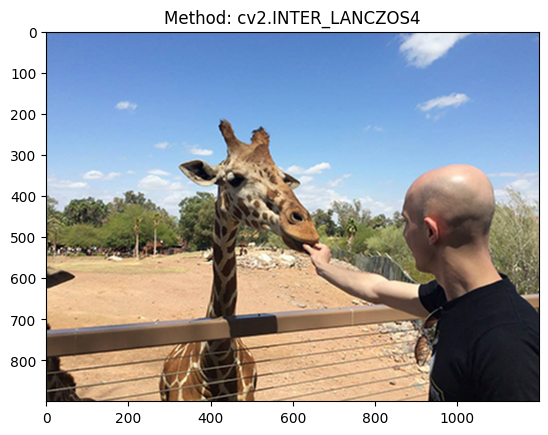

In [27]:
# construct the list of interpolation methods in OpenCV

methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods

for(name, methods) in methods:

# increase the size of the image by 3x using the current
# interpolation method

  print("[INFO] {}". format(name))
  resized = imutils.resize(image, width = image.shape[1] * 3, inter = methods)
  plt_imshow("Method: {}". format(name), resized)
